<a href="https://colab.research.google.com/github/jibin-sebastian/Flight-price-prediction/blob/main/FlightFarePrediction_Detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all importent libraries**

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

**Read Training Data**

In [114]:
#Read training data
train_data=pd.read_excel('/content/Data_Train.xlsx')

In [115]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


checking count of null values in train data 

In [119]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [120]:
pd.set_option('display.max_columns', None)

In [121]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Drop na values from train_data set

In [122]:
 train_data.dropna(inplace = True)

visualize missing (NaN) values 

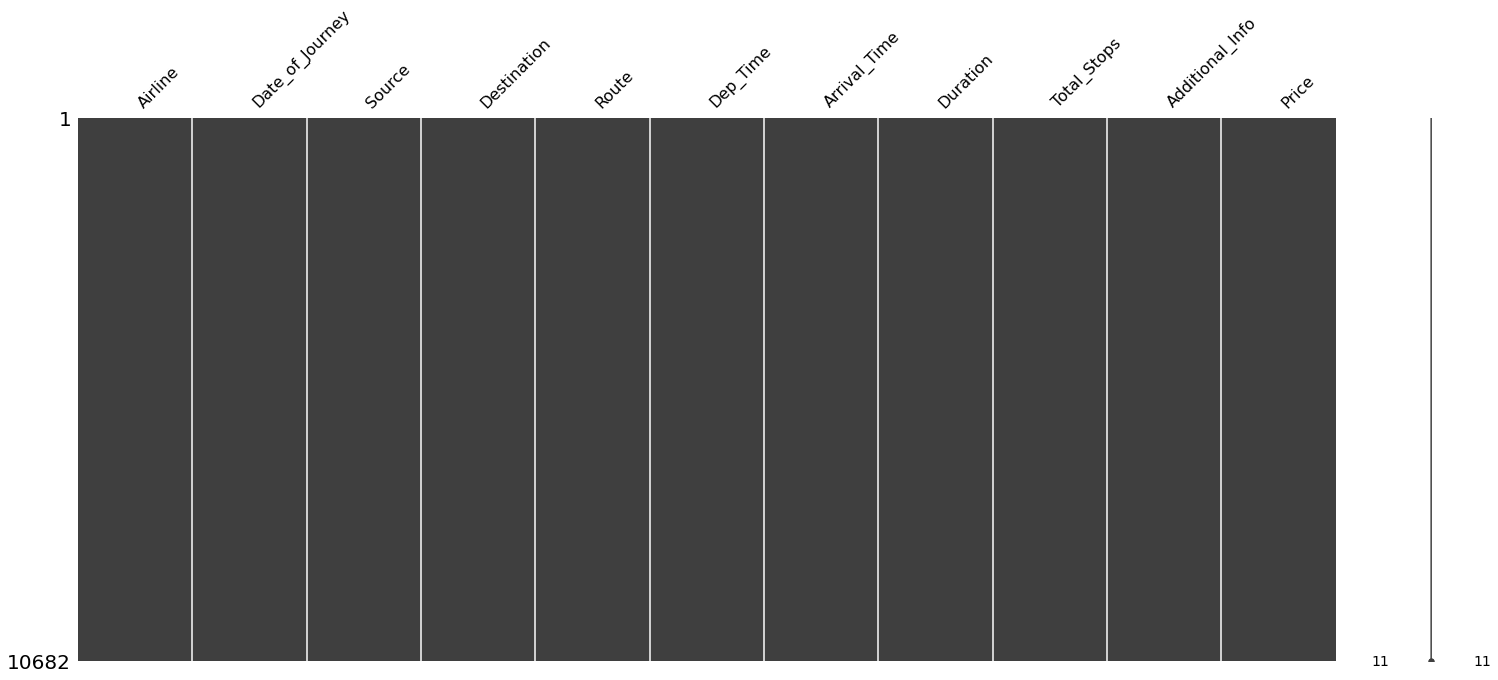

In [123]:
import missingno as msno
msno.matrix(train_data)

In [124]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**Explanatory Data Analysis**

From description we can see that Date_of_Journey is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [125]:
train_data['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [126]:
train_data['day_of_Journey']= pd.to_datetime(train_data['Date_of_Journey']).dt.day
train_data['month_of_Journey']= pd.to_datetime(train_data['Date_of_Journey']).dt.month

In [127]:
train_data['day_of_Journey']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: day_of_Journey, Length: 10682, dtype: int64

In [128]:
train_data['month_of_Journey']

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: month_of_Journey, Length: 10682, dtype: int64

In [129]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


Drop of date of journey

In [130]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [131]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


Convert departure time to int values and drop the Dep_Time column
Extract Departure hour from Dep_Time

In [132]:
train_data['hour_of_Dep']= pd.to_datetime(train_data['Dep_Time']).dt.hour
#Extract Departure minute from Dep_Time
train_data['min_of_Dep']= pd.to_datetime(train_data['Dep_Time']).dt.minute

Drop the Dep_Time col from train data

In [133]:
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [134]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [135]:
#convert Arrival_Time to int values and drop the Arrival_Time column
#Extract Arrival_Time hour from Arrival_Time
train_data['hour_of_arrival']= pd.to_datetime(train_data['Arrival_Time']).dt.hour
#Extract Arrival_Time minute from Arrival_Time
train_data['min_of_arrival']= pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [136]:
train_data.drop(['Arrival_Time'],axis=1, inplace=True)

In [137]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [138]:
list1=list(train_data['Duration'])
#print(list1)

In [139]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Time taken by plane to reach destination is called Duration

It is the differnce betwwen Departure Time and Arrival time

Assigning and converting Duration column into list

In [140]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [141]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [142]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [143]:
train_data.drop(['Duration'], axis=1,inplace=True)

In [144]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


Visualize the Count of flights month wise using countplot in seaborn


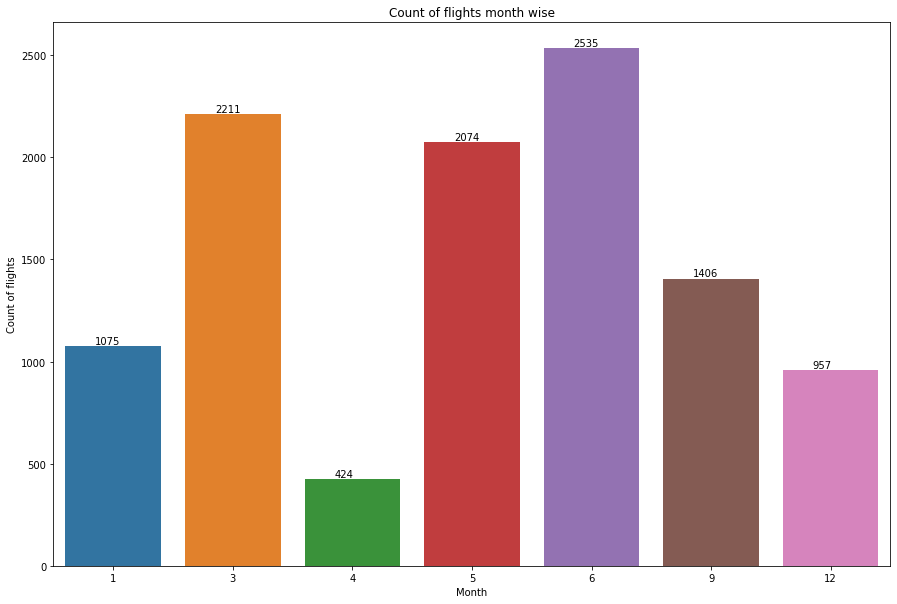

In [145]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')

ax=sns.countplot(x = 'month_of_Journey', data = train_data)

plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')


Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [146]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Visualize the Count of flights with different Airlines

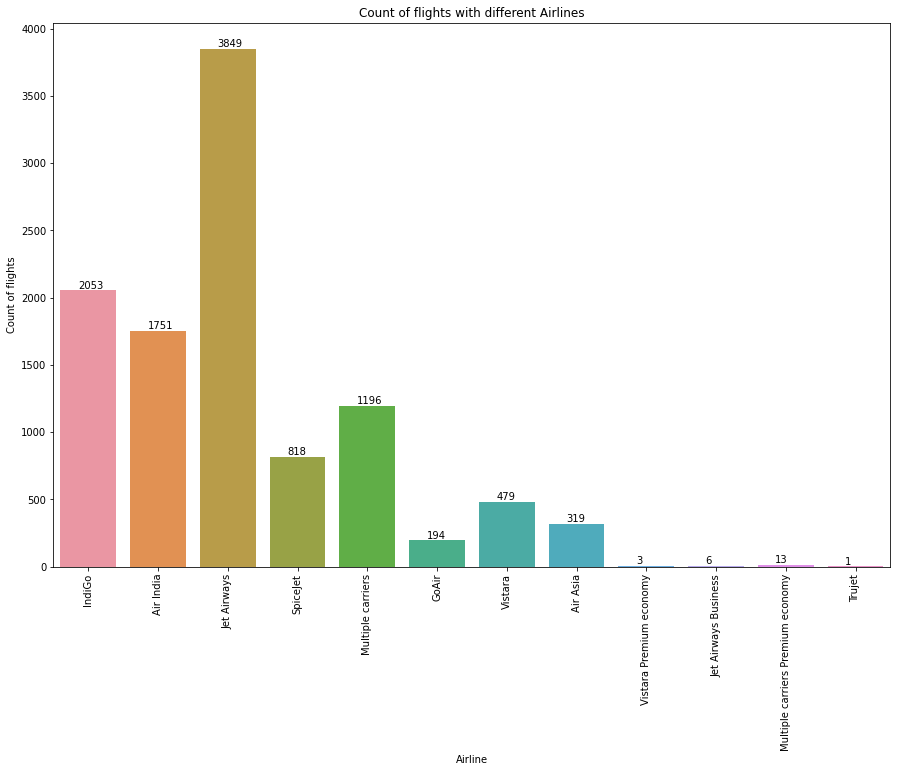

In [147]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
    
#There are more number of flights of Jet Airways.
#Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

Visualize Airline vs Price using catplot

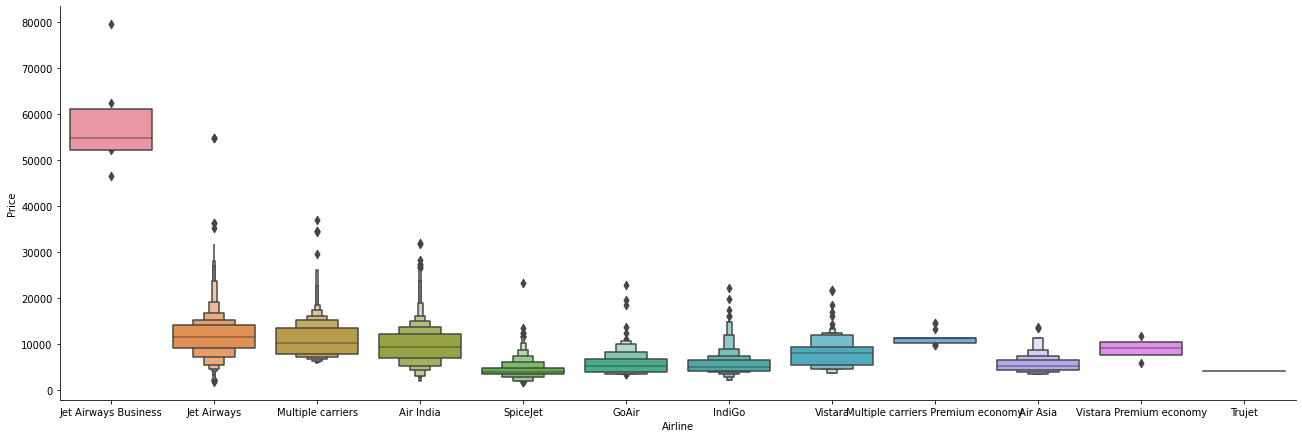

In [148]:
# Airline vs Price. plot the categorical features price Vs Airlines
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having almost similar median

In [149]:
#As airline is nominal categorical values, we will use onehot encoding.
airline = train_data[['Airline']]
print(airline)

           Airline
0           IndiGo
1        Air India
2      Jet Airways
3           IndiGo
4           IndiGo
...            ...
10678     Air Asia
10679    Air India
10680  Jet Airways
10681      Vistara
10682    Air India

[10682 rows x 1 columns]


In [150]:
#function used for onehotencoding.
airline= pd.get_dummies(airline, drop_first=True)   
#drop_first : drop the airline column from train data set
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [151]:
#next feature column is 'Source'
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Source vs Price. 
Plot the categorical features Source vs price using boxplot


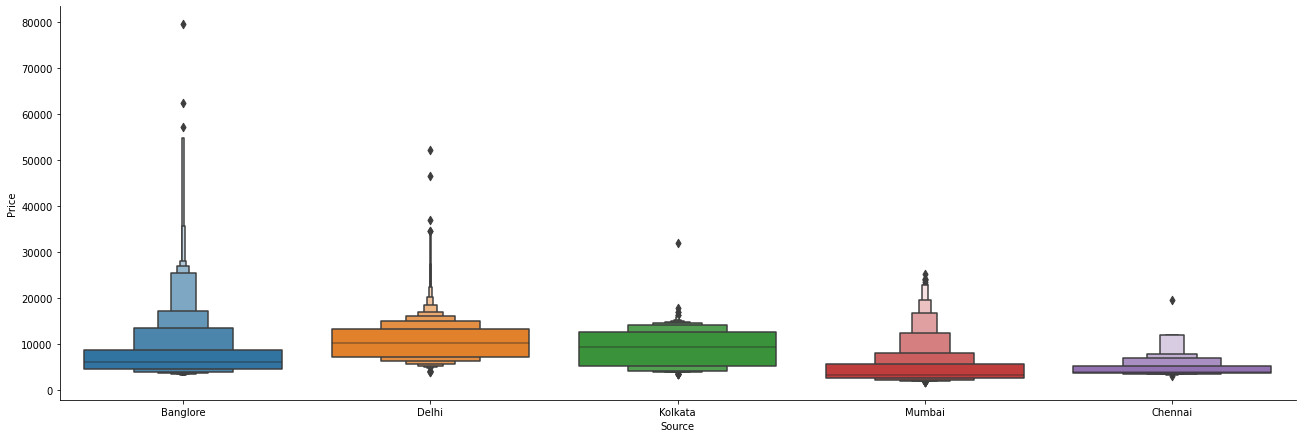

In [152]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [153]:
source= train_data[['Source']]
source.head()

,Source
0,Banglore
1,Kolkata
2,Delhi
3,Kolkata
4,Banglore


In [154]:
#function used for onehotencoding.
source= pd.get_dummies(source, drop_first=True)   
#drop_first : drop the airline column from train data set
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [155]:
#next feature col :  'Destination'
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Plot the categorical features Destination vs price using boxplot

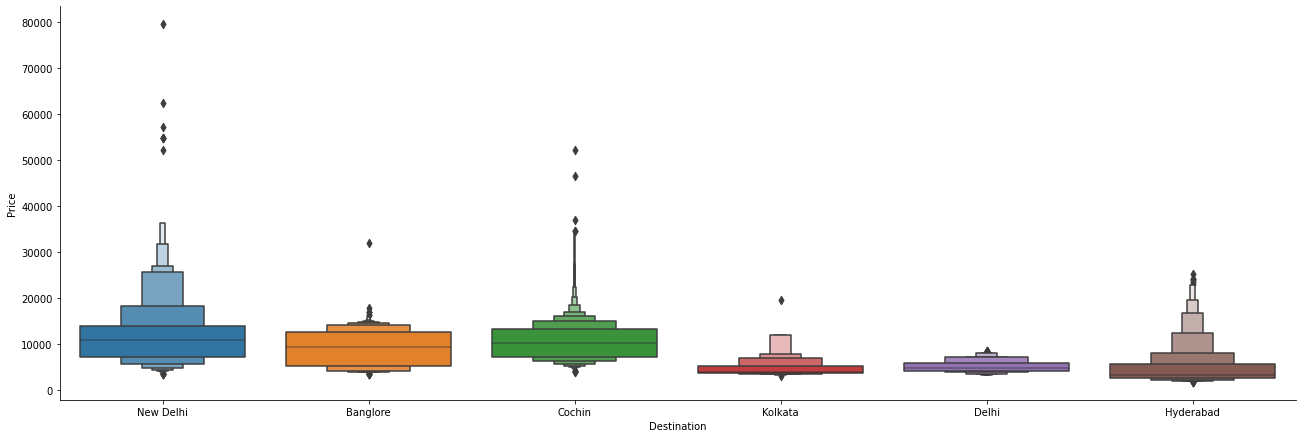

In [156]:
sns.catplot(y = "Price", x = "Destination", data = train_data, kind="boxen", height = 6, aspect = 3)
plt.show()

In [157]:
#function used for onehotencoding.
destination=train_data[['Destination']]
destination= pd.get_dummies(destination, drop_first=True)   
#drop_first : drop the airline column from train data set
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [158]:
#From Route and Total_stops providing same insight. Both are related to each other. So we can drop the Route
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [159]:
#drop col Route
train_data.drop(['Route'],axis=1, inplace=True)

In [160]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [161]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [162]:
#Drop Add Info col as well since it doesnt have much information (number of 'No info' : 8344)
train_data.drop(['Additional_Info'],axis=1, inplace=True)

In [163]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [ ]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

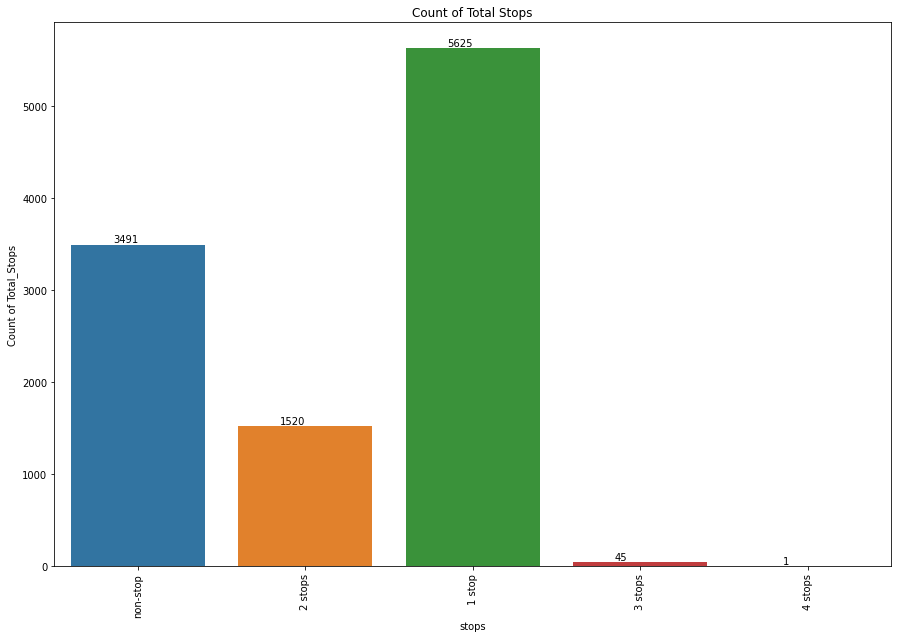

In [165]:
plt.figure(figsize = (15, 10))
plt.title('Count of Total Stops')
ax=sns.countplot(x = 'Total_Stops', data =train_data)
plt.xlabel('stops')
plt.ylabel('Count of Total_Stops')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In the case of 'Total_Stops'

As this is case of Ordinal Categorical type we perform LabelEncoder.

Here Values are assigned with corresponding keys

In [166]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [167]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


Concatenate both catagorical and numerical data

In [170]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
final_Train_data = pd.concat([train_data, airline, source, destination], axis = 1)

In [171]:
final_Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [172]:
#Drop "Airline", "Source", "Destination"
final_Train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [173]:
final_Train_data.head()

,Total_Stops,Price,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [175]:
final_Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   day_of_Journey                             10682 non-null  int64
 3   month_of_Journey                           10682 non-null  int64
 4   hour_of_Dep                                10682 non-null  int64
 5   min_of_Dep                                 10682 non-null  int64
 6   hour_of_arrival                            10682 non-null  int64
 7   min_of_arrival                             10682 non-null  int64
 8   Duration_hours                             10682 non-null  int64
 9   Duration_mins                              10682 non-null  int64
 10  Airline_Air India                          106

**TEST DATA preprocessing**

Follow the same steps used in preprocessing for train data

In [176]:
# Preprocessing

test_data= pd.read_excel('/content/Test_set.xlsx')

print("Test data Info")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
print(test_data.info())

print("Count of Null values :")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Test data Info
----------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Count of Null values :
----------------------------------------------------------------------------------------------------------------------------

Test Data Preprocessing

Apply all preprocessing steps on test data in order to avoid the data leakage.

In [177]:
#day_of_Journey
test_data['day_of_Journey']= pd.to_datetime(test_data['Date_of_Journey']).dt.day
test_data['month_of_Journey']= pd.to_datetime(test_data['Date_of_Journey']).dt.month
test_data['day_of_Journey']
test_data['month_of_Journey']
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_Journey,month_of_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [178]:
#Dep_Time
test_data['hour_of_Dep']= pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['min_of_Dep']= pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Dep_Time'],axis=1,inplace=True)

In [179]:
#Arrival_Time
test_data['hour_of_arrival']= pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['min_of_arrival']= pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'],axis=1, inplace=True)

In [180]:
#Duration
list1=list(test_data['Duration'])
print(list1)

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(['Duration'], axis=1,inplace=True)

['10h 55m', '4h', '23h 45m', '13h', '2h 50m', '18h 20m', '15h 5m', '5h 15m', '2h 45m', '6h 5m', '28h 55m', '9h 20m', '10h 15m', '4h 40m', '17h 20m', '10h 50m', '9h 15m', '12h 15m', '9h 10m', '9h 20m', '14h 50m', '14h 5m', '11h 35m', '13h 30m', '2h 50m', '12h 25m', '2h 30m', '25h 30m', '19h 25m', '7h', '2h 30m', '11h 40m', '7h 5m', '3h', '1h 25m', '2h 40m', '1h 25m', '6h 5m', '17h 5m', '10h 40m', '2h 30m', '12h 30m', '1h 30m', '23h 40m', '5h 15m', '2h 20m', '23h 35m', '1h 30m', '27h 40m', '13h 30m', '28h 20m', '5h 45m', '26h 25m', '5h 40m', '2h 15m', '2h 55m', '5h 45m', '7h 30m', '5h 20m', '25h 50m', '13h 15m', '26h 20m', '5h 45m', '5h 40m', '2h 40m', '2h 50m', '5h 25m', '8h 45m', '3h', '7h 20m', '1h 30m', '21h 10m', '16h', '7h 50m', '1h 30m', '3h', '2h 50m', '19h 25m', '2h 55m', '14h 5m', '2h 50m', '16h 5m', '5h 55m', '2h 30m', '10h 15m', '13h 50m', '2h 15m', '11h 55m', '2h 30m', '13h 20m', '18h 10m', '28h 10m', '5h', '23h 15m', '1h 15m', '1h 20m', '13h 25m', '6h 15m', '1h 20m', '10h 1

In [181]:
#airline
airline= test_data[['Airline']]
airline= pd.get_dummies(airline, drop_first=True)  

In [182]:
#Source
source= test_data[['Source']]
source= pd.get_dummies(source, drop_first=True)

In [183]:
#Destination
destination=test_data[['Destination']]
destination= pd.get_dummies(destination, drop_first=True)

In [184]:
#Route.Drop Route col
test_data.drop(['Route'],axis=1, inplace=True)

In [185]:
#Additional_Info. Drop col 'Additional_Info'
test_data.drop(['Additional_Info'],axis=1, inplace=True)

In [186]:
#Total_stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [188]:
# Concatenate dataframe --> test_data + Airline + Source + Destination And delete the col of airline, source and destination
final_test_data = pd.concat([test_data, airline, source, destination], axis = 1)
final_test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [189]:
final_test_data.shape
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   day_of_Journey                             2671 non-null   int64
 2   month_of_Journey                           2671 non-null   int64
 3   hour_of_Dep                                2671 non-null   int64
 4   min_of_Dep                                 2671 non-null   int64
 5   hour_of_arrival                            2671 non-null   int64
 6   min_of_arrival                             2671 non-null   int64
 7   Duration_hours                             2671 non-null   int64
 8   Duration_mins                              2671 non-null   int64
 9   Airline_Air India                          2671 non-null   uint8
 10  Airline_GoAir                              2671 

In [ ]:
Data_Train.shape
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   day_of_Journey                             10682 non-null  int64
 3   month_of_Journey                           10682 non-null  int64
 4   hour_of_Dep                                10682 non-null  int64
 5   min_of_Dep                                 10682 non-null  int64
 6   hour_of_arrival                            10682 non-null  int64
 7   min_of_arrival                             10682 non-null  int64
 8   Duration_hours                             10682 non-null  int64
 9   Duration_mins                              10682 non-null  int64
 10  Airline_Air India                          106


**Feature Selection**

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

**SelectKBest**

In [190]:
final_Train_data.columns

Index(['Total_Stops', 'Price', 'day_of_Journey', 'month_of_Journey',
       'hour_of_Dep', 'min_of_Dep', 'hour_of_arrival', 'min_of_arrival',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

Select the independed features.


In [195]:
#Price (dependend) col is not in this list
x_independed = final_Train_data.loc[:, ['Total_Stops', 'day_of_Journey', 'month_of_Journey',
       'hour_of_Dep', 'min_of_Dep', 'hour_of_arrival', 'min_of_arrival',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x_independed.head()

,Total_Stops,day_of_Journey,month_of_Journey,hour_of_Dep,min_of_Dep,hour_of_arrival,min_of_arrival,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [196]:
y_depended = final_Train_data.iloc[:, 1]
y_depended.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

If two or more independent features are highly correlated , we can drop one or two features. To find the important features we are using ExtraTreeRegressor. 

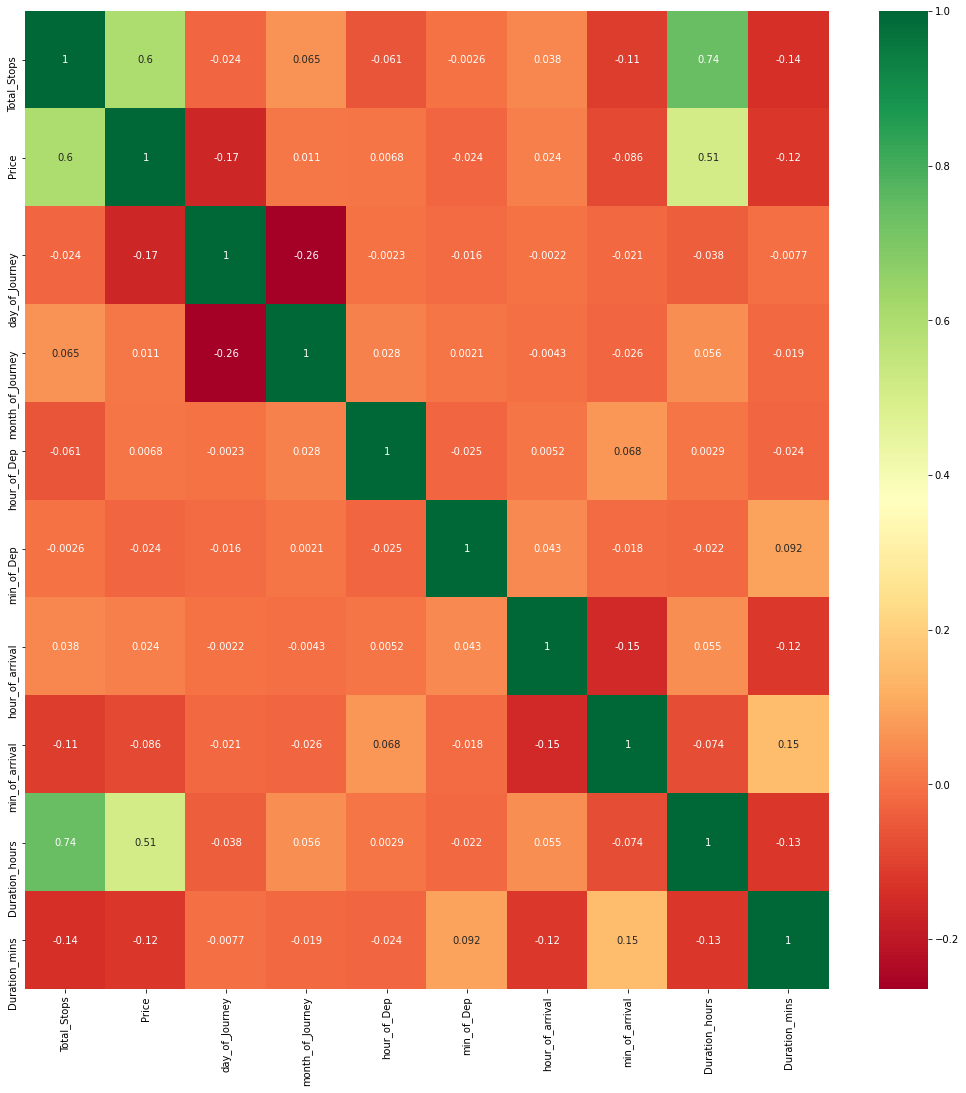

In [198]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [205]:
#Find the highly correlated features.
#since it is a small data set and only one feature having correlation more than 90%, we are not dropping this from data set
correlated_features = set()
correlation_matrix = train_data.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

set()


In [199]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_independed, y_depended)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [200]:
print(selection.feature_importances_)

[2.22078464e-01 1.08763130e-01 8.46622995e-02 2.57082550e-02
 2.17127152e-02 2.98537327e-02 2.11353948e-02 1.04684092e-01
 1.77983959e-02 1.10792216e-02 1.73527118e-03 1.70212132e-02
 1.49294990e-01 6.68976670e-02 1.86610706e-02 1.00948813e-03
 3.17892467e-03 9.64188998e-05 5.62773240e-03 1.37262181e-04
 4.65094111e-04 1.09366253e-02 4.55165908e-03 6.86522194e-03
 1.58489922e-02 1.93268385e-02 7.38246558e-03 4.92533256e-04
 2.29948316e-02]


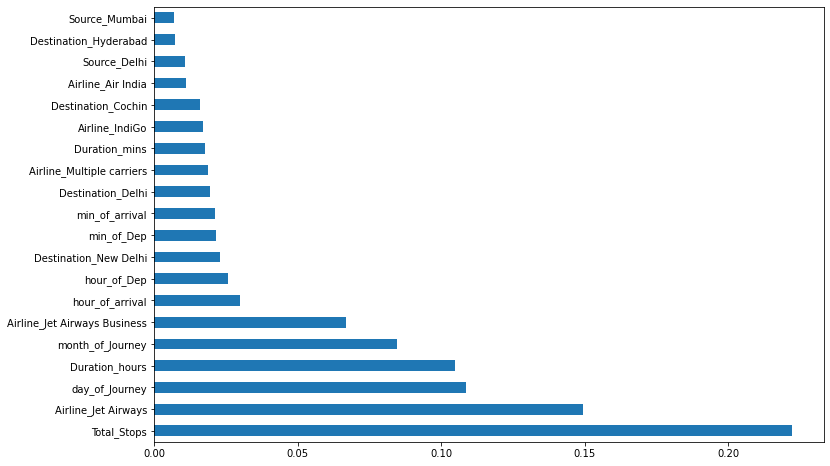

In [201]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x_independed.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
#from the graph , its clear that total_stop has more importance

Implement the different algorithms and find the best fit.

1. Split dataset into train and test set in order to prediction w.r.t X_test


In [206]:
pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_independed, y_depended, test_size = 0.2, random_state = 42)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [216]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8545, 29)
The size of training output is (8545,)
**************************************************
The size of testing input is (2137, 29)
The size of testing output is (2137,)


In [208]:
#find the best alogorithm
#import libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [209]:
models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['HuberRegressor : ', HuberRegressor()],
          ['XGBRegressor : ', XGBRegressor()],
          ['BayesianRidge : ', BayesianRidge()]]

In [210]:
print(models)

[['LinearRegression : ', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)], ['ElasticNet :', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)], ['Lasso : ', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)], ['Ridge : ', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)], ['KNeighborsRegressor : ', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')], ['DecisionTreeRegressor : ', DecisionTreeRegressor(ccp_alpha=0.0, criterion

In [211]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  2875.378820303944
ElasticNet : 3520.7455916655294
Lasso :  2877.470296686765
Ridge :  2878.8315343543945
KNeighborsRegressor :  3037.051412069077
DecisionTreeRegressor :  2496.8048644212013
RandomForestRegressor :  2129.2978896863756
SVR :  4643.370521026606
AdaBoostRegressor :  3538.41691155928
GradientBoostingRegressor :  2106.271614687161
ExtraTreeRegressor :  2390.9287754781567
HuberRegressor :  3158.177092463484
XGBRegressor :  1818.4249893522529
BayesianRidge :  2875.1706769559164


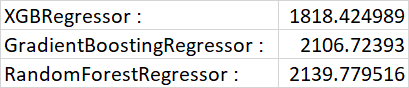

In [212]:
#Hyper parameter tuning
algorithms = {
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [213]:
score = []
for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 5,random_state=42,n_jobs=1, verbose=2)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   1.1s
[CV] min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   1.1s
[CV] min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   1.1s
[CV] min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   1.0s
[CV] min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   1.0s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.25, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=3, learning_rate=0.25, gamma=0.1, colsample_bytree=0.3, total=   0.3s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.25, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7, total=   1.2s
[CV] n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7, total=   1.1s
[CV] n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7 
[CV]  n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7, total=   1.1s
[CV] n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7 
[CV]  n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7, total=   1.1s
[CV] n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7 
[CV]  n_estimators=300, min_samples_split=4, max_features=sqrt, max_depth=7, total=   1.1s
[CV] n_estimators=2100, min_samples_split=6, max_features=sqrt, max_depth=13 
[CV]  n_estimators=2100, min_samples_split=6, max_features=sqrt, max_depth=13, total=  11.5s
[CV] n_estimators=2100, min_samples_split=6, max_features=sqrt, max_depth=13 
[CV]  n_estimators=2100, min_samples_split=6, max_features=sqrt, max_depth=13, total=  11.4s
[CV] n_estimators=2100, min_samples_split=6, max_features=sqrt, ma

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, learning_rate=0.5, criterion=friedman_mse .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, learning_rate=0.5, criterion=friedman_mse, total=   2.1s
[CV] n_estimators=300, learning_rate=0.5, criterion=friedman_mse .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=300, learning_rate=0.5, criterion=friedman_mse, total=   2.1s
[CV] n_estimators=300, learning_rate=0.5, criterion=friedman_mse .....
[CV]  n_estimators=300, learning_rate=0.5, criterion=friedman_mse, total=   2.1s
[CV] n_estimators=300, learning_rate=0.5, criterion=friedman_mse .....
[CV]  n_estimators=300, learning_rate=0.5, criterion=friedman_mse, total=   2.2s
[CV] n_estimators=300, learning_rate=0.5, criterion=friedman_mse .....
[CV]  n_estimators=300, learning_rate=0.5, criterion=friedman_mse, total=   2.1s
[CV] n_estimators=300, learning_rate=0.8, criterion=friedman_mse .....
[CV]  n_estimators=300, learning_rate=0.8, criterion=friedman_mse, total=   2.1s
[CV] n_estimators=300, learning_rate=0.8, criterion=friedman_mse .....
[CV]  n_estimators=300, learning_rate=0.8, criterion=friedman_mse, total=   2.1s
[CV] n_estimators=300, learning_rate=0.8, criterion=friedman_mse .....
[CV]  n_estimators=300, learning_rate=0.8, criterion=friedman_mse, total=   2.1s
[CV] n_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


In [214]:
final = pd.DataFrame(score, columns=['model', 'score', 'params'])
final

,model,score,params
0,XGBRegressor,0.82,"{'min_child_weight': 3, 'max_depth': 7, 'learn..."
1,RandomForestRegressor,0.82,"{'n_estimators': 2100, 'min_samples_split': 4,..."
2,GradientBoostingRegressor,0.81,"{'n_estimators': 700, 'learning_rate': 0.3, 'c..."


In [215]:
final['params'][1]

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 2100}

In [217]:
regressor = RandomForestRegressor(n_estimators=2100, max_depth=15, min_samples_split=4, max_features='auto')
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

RMSE : 2038.229334634458


In [218]:
# Evaluating the RandomForestRegressor Algorithm
from sklearn import metrics
#X_train, X_test, y_train, y_test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 1158.1795727839392
Mean Squared Error: 4154378.8205644246
Root Mean Squared Error: 2038.229334634458


**score()**

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [219]:
regressor.score(X_train, y_train), regressor.score(X_test, y_test)

(0.9280274102217418, 0.8073291917010182)

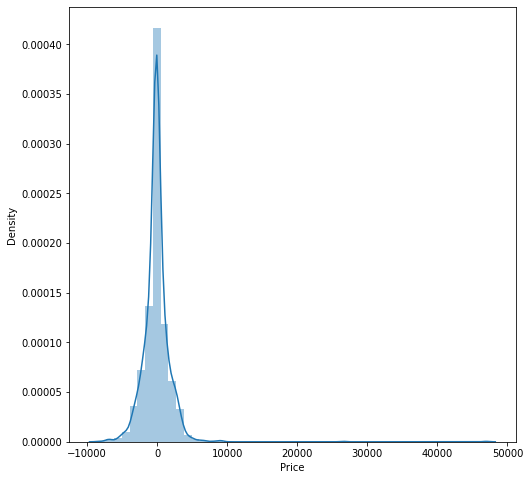

In [220]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

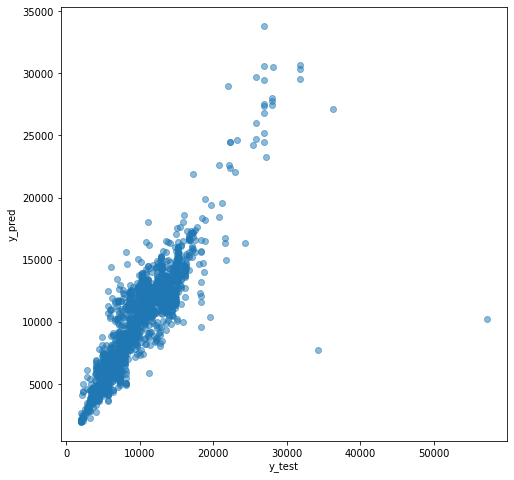

In [221]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

**Save the model to reuse it again**

In [222]:
import pickle
# open a file, where you ant to store the data
file = open('final_model.pkl', 'wb')
# dump information to that file
pickle.dump(regressor, file)

In [223]:
model = open('final_model.pkl','rb')
forest = pickle.load(model)

In [224]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.8073291917010181